<a href="https://colab.research.google.com/github/yoonju977/Digital-Image-Processing/blob/main/CCA_TeamPr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E'

Mounted at /content/drive


## Task별 전처리 구성

### **Task1**
- **전처리 단계**
  1. Gaussian Blur: 노이즈 제거 및 경계부 부드럽게 처리
  2. CLAHE: 대비를 높여 객체와 배경의 구분을 명확히 함
  3. Otsu Thresholding: 자동 임계값을 이용하여 이진화
  4. Morphological Operation (Opening): 작은 노이즈 제거 및 객체 경계 정리
- **목적**: 객체(과자)의 윤곽을 명확히 하고 배경의 영향을 최소화 함. 다만 -02에서 뭉쳐진 부분의 CCA가 하나로 인식

### **Task3**
- **전처리 단계**
  1. Adaptive Thresholding: 쌀알처럼 밝기 변화가 작은 객체를 효과적으로 이진화
  2. Erosion: 객체 경계를 다듬고 작은 연결부를 제거
- **목적**: 서로 붙어 있는 작은 쌀알을 구분하는 것에 focus를 맞춤 그러다 보니 task1과 달리 경계를 모호하게 할수 있는 전처리 모두 제거하고 오로지 밝기에 의해 이진화를 적용, 작은 연결부의 경우 CCA과정에서 하나로 인식될수 있으므로 Erosion 진행 -> 붙어 있은 쌀알을 Count 할수 있게됨.

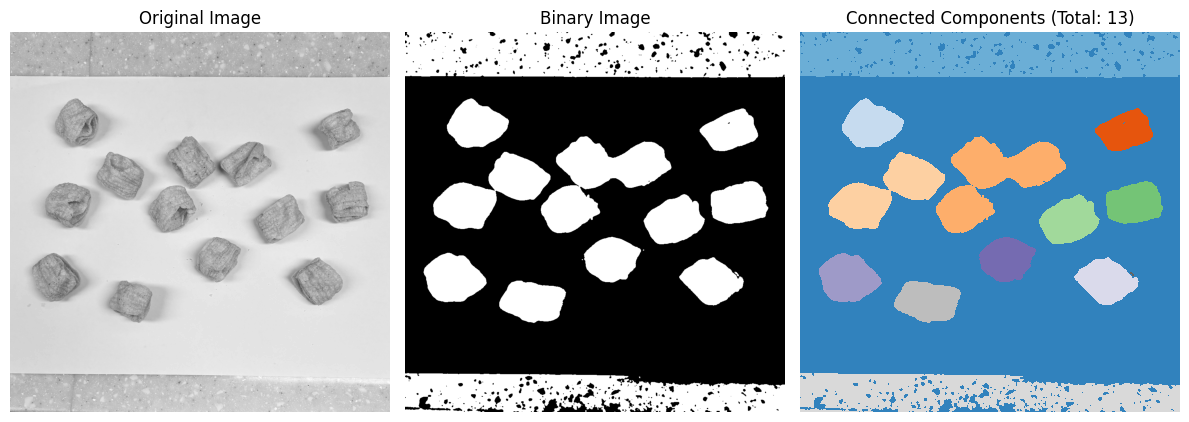

Total Connected Components: 13


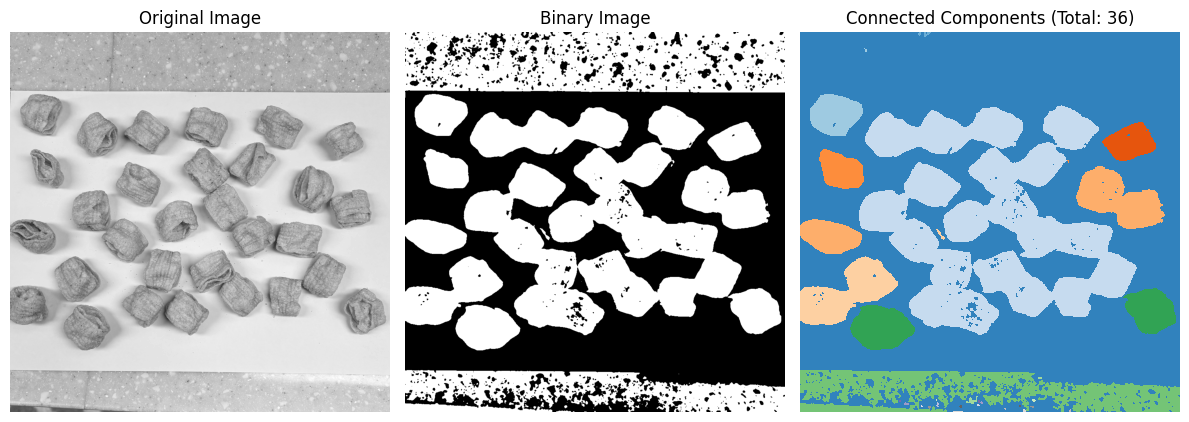

Total Connected Components: 36


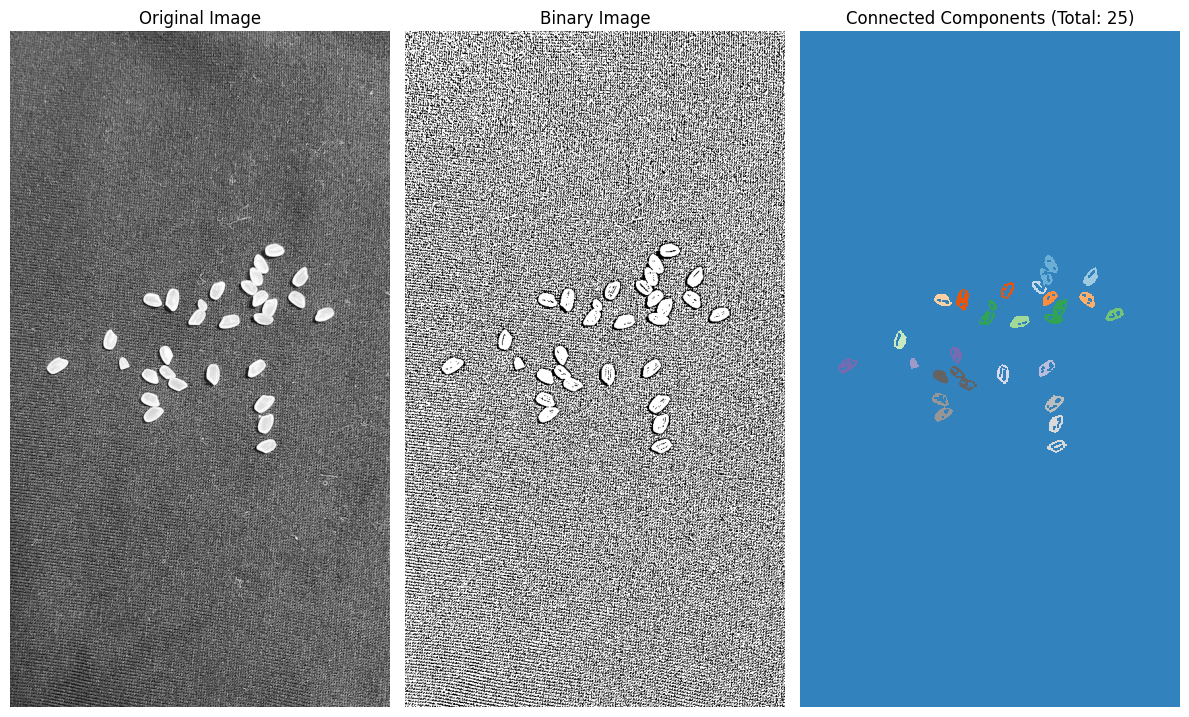

Total Connected Components: 25


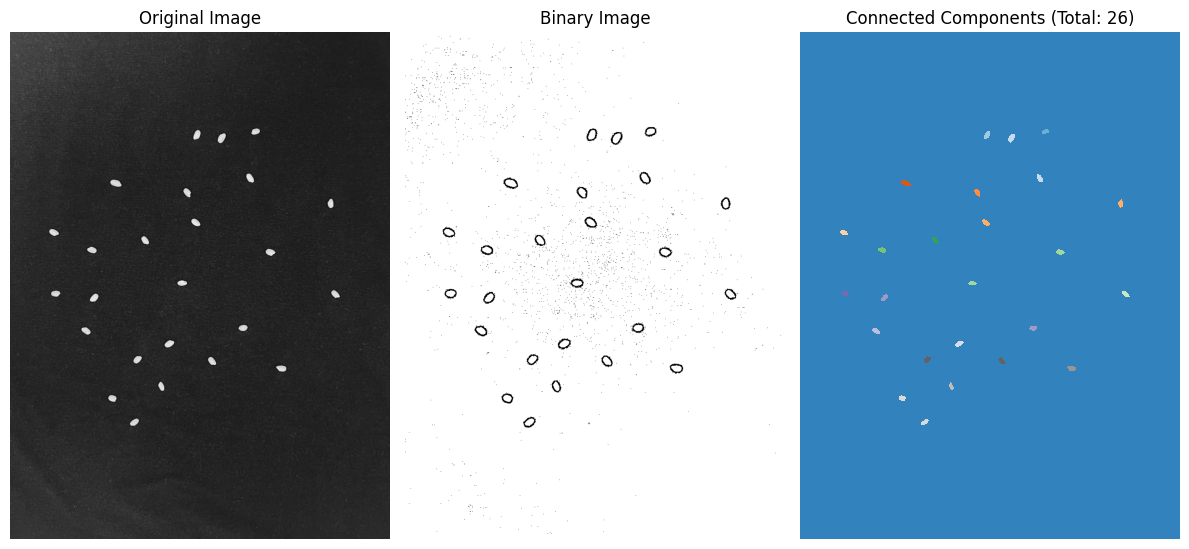

Total Connected Components: 26


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from PIL import Image

# 전처리 함수들
#Gaussian Blur 적용
def gaussian_blur(image, sigma=1.5):
    return nd.gaussian_filter(image, sigma=sigma)

#CLAHE (대비 향상) 적용
def clahe_enhancement(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

#Adaptive Thresholding 적용
def adaptive_threshold(image, block_size=15, C=10):
    return cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C
    )
#Otsu Thresholding 적용
def otsu_thresholding(image):
    _, binary_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_img = cv2.bitwise_not(binary_img)
    return binary_img

#Erosion 적용
def erosion(image, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(image, kernel, iterations=iterations)

#Morphological Operation (Opening/Closing)
def morphological_operation(image, se_size=(3, 3), operation="open"):
    se = np.ones(se_size)
    if operation == "open":
        return nd.binary_opening(image, structure=se).astype(np.uint8)
    elif operation == "close":
        return nd.binary_closing(image, structure=se).astype(np.uint8)
    return image

#Connected Component Analysis
def connected_component_analysis(binary_img, min_size=20):
    labeled_img, num_features = nd.label(binary_img)
    component_sizes = np.bincount(labeled_img.ravel())
    for i, size in enumerate(component_sizes):
        if size < min_size:
            labeled_img[labeled_img == i] = 0
    labeled_img, num_features = nd.label(labeled_img > 0)
    return labeled_img, num_features


# Task 처리 함수
def process_task(image_path, task_type):
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if task_type == "task1":
        processed_img = gaussian_blur(original_img, sigma=1.5)
        processed_img = clahe_enhancement(processed_img)
        binary_img = otsu_thresholding(processed_img)
        processed_img = morphological_operation(binary_img, se_size=(3, 3), operation="open")

    elif task_type == "task3":
        binary_img = adaptive_threshold(original_img, block_size=15, C=10)
        processed_img = erosion(binary_img, kernel_size=(3, 3), iterations=1)

    else:
        raise ValueError("Invalid task_type.")

    # Connected Component Analysis
    labeled_img, num_components = connected_component_analysis(processed_img, min_size=20)

    # 결과 시각화
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(labeled_img, cmap='tab20c', interpolation='nearest')
    plt.title(f'Connected Components (Total: {num_components})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Total Connected Components: {num_components}")


# 실행 코드
if __name__ == "__main__":
    task1_01_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task1_01.jpeg"
    process_task(task1_01_image_path, task_type="task1")

    task1_02_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task1_02.jpeg"
    process_task(task1_02_image_path, task_type="task1")

    task3_01_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task3_01.jpg"
    process_task(task3_01_image_path, task_type="task3")

    task3_02_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task3_02.jpg"
    process_task(task3_02_image_path, task_type="task3")

### **Task2**
- **전처리 단계**
  1. Canny Edge Detection
  - **목적**: 우선 배경에 th를 적용하거나 밝기 혹은 색의 차이에 의해 경계화를 시키면 배경의 나무무늬 혹은 배경의 다른 부분이 count되는 현상이 발생해 차라리 객체의 경계만을 추출하고자 해당 전처리 진행.
  Sigma 값을 사용하여 경계 추출의 민감도를 조정하며, 큰 Sigma 값은 부드러운 경계를 생성하고 작은 Sigma 값은 더 세밀한 경계를 생성. task2는 sigma 값이 2일때 가장 명확해서 2로 세팅
  2. Dilation
  - **목적**: Canny Edge Detection으로 따낸 경계를 좀더 두껍게 해서 객체를 connected를 증가시켜 객체를 명확히함.
  3. Erosion
  - **목적**: 사진을 보면 팬들끼리 거리가 가까운경우 CCA진행시 하나로 인식. Dilation 탓인가 하여 Dilation처리를 제거해보았으나,  거리가 가까우면 하나로 인식하는 문제 동일하게 발생 Erosion의 적용으로 팬의 윤곽선을 줄이고 작은 노이즈를 제거하여 하나로 인식되는 팬을 분리.


Processing Task2-1


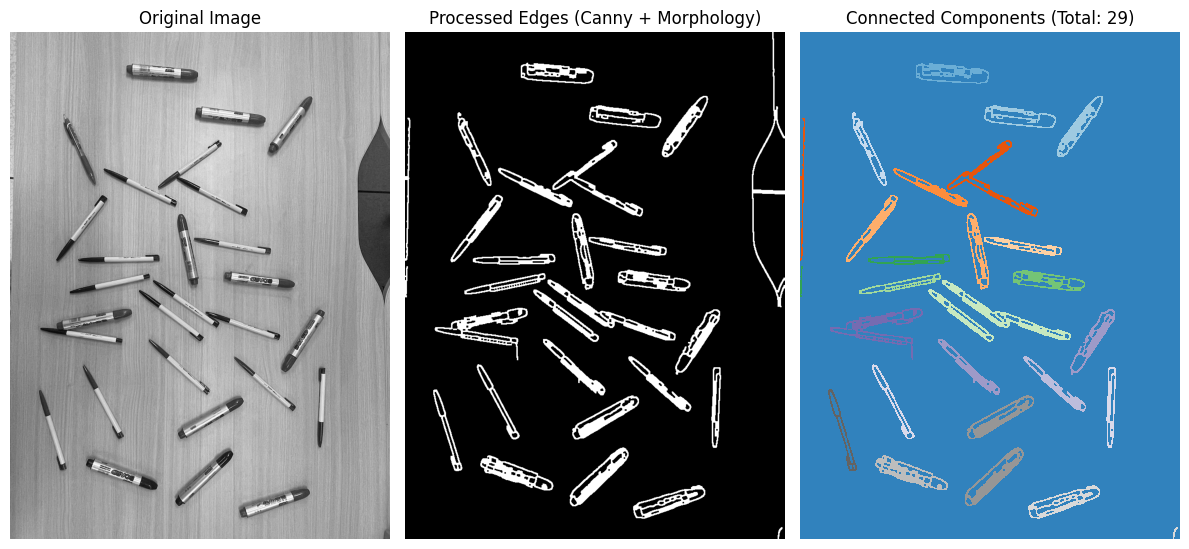

Total Connected Components: 29

Processing Task2-2


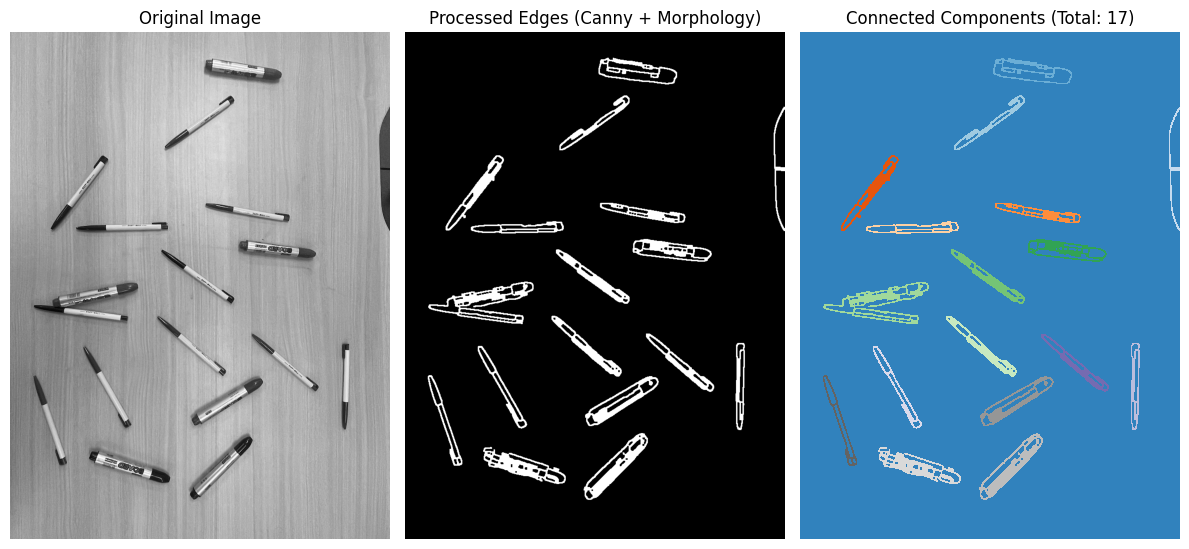

Total Connected Components: 17


In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import scipy.ndimage as nd
import cv2

# 전처리 함수들
#Canny Edge Detection 적용
def canny_edge_detection(image, sigma=2.0):
    edges = feature.canny(image, sigma=sigma)
    return (edges * 255).astype(np.uint8)

#Dilation 적용
def dilation(image, kernel_size=(3, 3), iterations=2):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.dilate(image, kernel, iterations=iterations)

#Erosion 적용
def erosion(image, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(image, kernel, iterations=iterations)

def connected_component_analysis(binary_img, min_size=50):
    labeled_img, num_features = nd.label(binary_img)

    # 컴포넌트 크기 필터링
    component_sizes = np.bincount(labeled_img.ravel())
    for i, size in enumerate(component_sizes):
        if size < min_size :
            labeled_img[labeled_img == i] = 0

    labeled_img, num_features = nd.label(labeled_img > 0)
    return labeled_img, num_features

# 전처리 및 분석 함수
def process_image(image_path):
    original_img = np.array(Image.open(image_path).convert('L'))

    processed_img = canny_edge_detection(original_img, sigma=2.0)
    processed_img = dilation(processed_img, kernel_size=(3, 3), iterations=2)
    processed_img = erosion(processed_img, kernel_size=(3, 3), iterations=1)

    # Connected Component Analysis
    labeled_img, num_components = connected_component_analysis(processed_img, min_size=50)

    # 결과 시각화
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Edges (Canny + Morphology)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(labeled_img, cmap='tab20c', interpolation='nearest')
    plt.title(f'Connected Components (Total: {num_components})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Total Connected Components: {num_components}")


# 실행 코드
if __name__ == "__main__":
    task2_1_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task2_01.jpeg"
    print("\nProcessing Task2-1")
    process_image(task2_1_image_path)
    task2_2_image_path = "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task2_02.jpeg"
    print("\nProcessing Task2-2")
    process_image(task2_2_image_path)